<a href="https://colab.research.google.com/github/mukheshbabu/machine-learning/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Working with an image dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

print("Data shape:", X.shape)
print("Labels shape:", y.shape)

Data shape: (1797, 64)
Labels shape: (1797,)


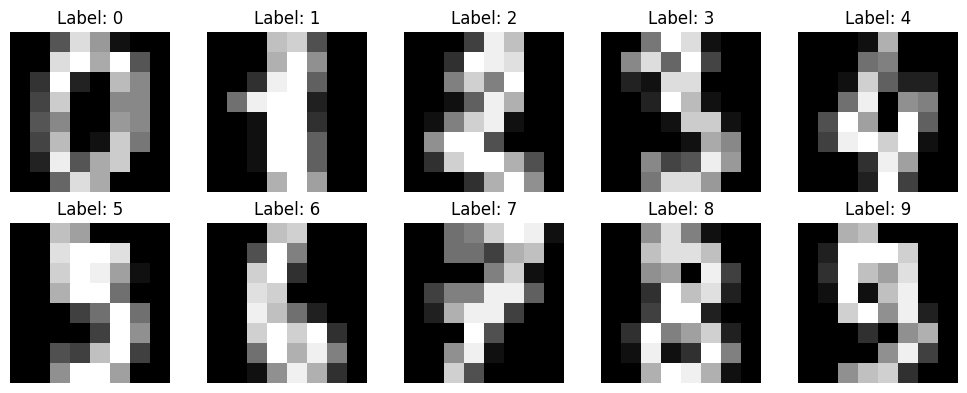

In [4]:
### Visualizing sample images

def plot_digits(images, labels, n_rows=2, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4))
    axes = axes.ravel()
    for i in range(n_rows * n_cols):
        axes[i].imshow(images[i].reshape(8, 8), cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

plot_digits(X, y)

In [6]:
### Applying t-SNE

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
n_samples = 500
X_sub = X_scaled[:n_samples]
y_sub = y[:n_samples]

tsne = TSNE(n_components=2,
            perplexity=30,
            n_iter=1000,
            random_state=42)
X_tsne = tsne.fit_transform(X_sub)

print("t-SNE result shape:", X_tsne.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE result shape: (500, 2)


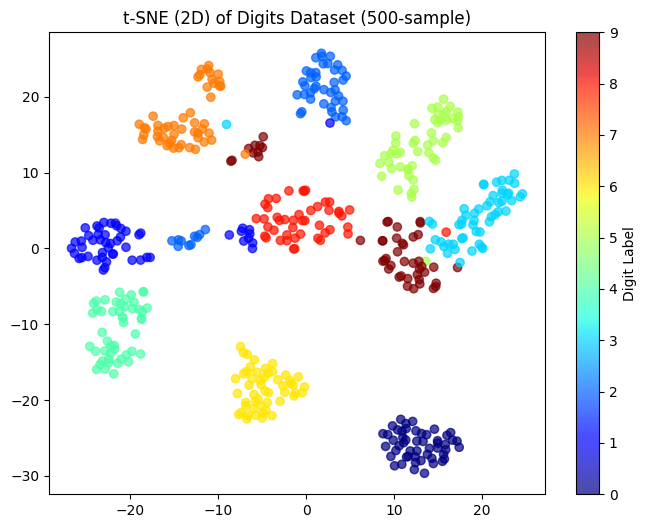

In [9]:
### Visualizing t-SNE output

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
                      c=y_sub, cmap='jet', alpha=0.7)
plt.colorbar(scatter, label='Digit Label')
plt.title('t-SNE (2D) of Digits Dataset (500-sample)')
plt.show()

Comparing images #262 and #462
Distance in t-SNE space: 23.4832
Label of image #262: 6
Label of image #462: 8


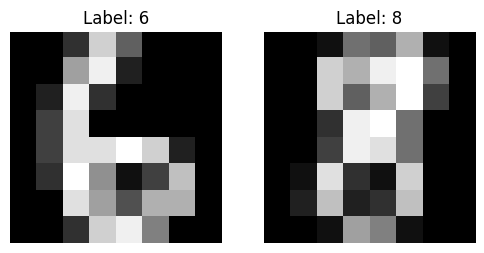

In [10]:
### Comparing images in t-SNE space

import random

idx1, idx2 = random.sample(range(X_tsne.shape[0]), 2)

point1, point2 = X_tsne[idx1], X_tsne[idx2]
dist_tsne = np.linalg.norm(point1 - point2)

print(f"Comparing images #{idx1} and #{idx2}")
print(f"Distance in t-SNE space: {dist_tsne:.4f}")
print(f"Label of image #{idx1}: {y_sub[idx1]}")
print(f"Label of image #{idx2}: {y_sub[idx2]}")

# Plot the original images
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(X[idx1].reshape(8, 8), cmap='gray')
axes[0].set_title(f"Label: {y_sub[idx1]}")
axes[0].axis('off')

axes[1].imshow(X[idx2].reshape(8, 8), cmap='gray')
axes[1].set_title(f"Label: {y_sub[idx2]}")
axes[1].axis('off')

plt.show()